In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
## Load the data
df = pd.read_csv("aia.us.csv")

## preprocessing

# Add new features
# 1. calculate Simple Return (Close - Open) feature
df['Simple_Return'] = (df['Close'] - df['Open'])/df['Open']
# 2. Calculate the Simple Moving Average (SMA) over a five row window for Open, High, Low, and Close
window_size = 5
df["SMA_Open"] = df["Open"].rolling(window=window_size).mean()
df["SMA_High"] = df["High"].rolling(window=window_size).mean()
df["SMA_Low"] = df["Low"].rolling(window=window_size).mean()
df["SMA_Close"] = df["Close"].rolling(window=window_size).mean()
# 3. feature extration from the Date column, get Year, Month, Day of Month, and Day of Week features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Month'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.weekday
# 4. convert the year column to elapsed time from the first year (or use it to group data?)
df["Year"] = df["Year"] - 2007
# 5. convert the Month column into categorical feature based on the best and worst months analysis using one hot encoding 
df["Best_Months"] = df["Month"].isin([2, 3, 10, 11]).astype(int)
df["Intermediate_Months"] = df["Month"].isin([0, 6, 9]).astype(int)
df["Worst_Months"] = df["Month"].isin([1, 4, 5, 7, 8]).astype(int)
# 6. calculate cosine and sine values of Day_of_Week to preserve the relation between days
df['Day_of_Week_sin'] = np.sin(df['Day_of_Week'] * (2 * np.pi / 7))
df['Day_of_Week_cos'] = np.cos(df['Day_of_Week'] * (2 * np.pi / 7))

# Calculate labels (continuous and discrete)
# Continuous: Log Return feature Using Close price (Log Return = ln(Close_t / Close_t-1) * 100)
df['Log_Return_Percentage'] = np.log(df['Close'] / df['Close'].shift(1)) * 100
# Discrete: calculate from the sign of the Log Return feature
df['label'] = (df['Log_Return_Percentage'] > 0).astype(int)

# detect missing data, and replace all empty spaces or null values with NaN
df = df.fillna(value=np.nan)
# remove all rows with missing data
df = df.iloc[4:]

# detect outliers and analyze
# plot box plots
# box_plots = df.boxplot(column=["Open", "High", "Low", "Close", "Simple_Return", "Log_Return%", "Simple_Moving_Average (SMA)"])
# box_plots = df.boxplot(column=["Year", "Month", "Day_of_Month", "Day_of_Week", "Day_of_Week_sin", "Day_of_Week_cos"])
# box_plots = df.boxplot(column="Volume")
# remove datapoints that has Volumn >= 150000
df = df[df["Volume"] < 150000]


# print dataset
df

,Date,Open,High,Low,Close,Volume,OpenInt,Simple_Return,SMA_Open,SMA_High,...,Month,Day_of_Month,Day_of_Week,Best_Months,Intermediate_Months,Worst_Months,Day_of_Week_sin,Day_of_Week_cos,Log_Return_Percentage,label
4,2007-11-26,41.282,41.612,40.5940,40.594,8492,0,-0.016666,42.2610,42.4682,...,11,26,0,1,0,0,0.000000,1.000000,1.301730,1
5,2007-11-27,40.594,41.420,40.5940,41.343,8377,0,0.018451,41.8932,42.1334,...,11,27,1,1,0,0,0.781831,0.623490,1.828285,1
6,2007-11-28,42.310,42.946,42.1190,42.946,18246,0,0.015032,41.4838,41.8512,...,11,28,2,1,0,0,0.974928,-0.222521,3.804039,1
7,2007-11-29,43.189,43.591,42.6940,43.478,20425,0,0.006692,41.6842,42.1230,...,11,29,3,1,0,0,0.433884,-0.900969,1.231155,1
8,2007-11-30,43.973,44.184,43.0170,43.017,10787,0,-0.021741,42.2696,42.7506,...,11,30,4,1,0,0,-0.433884,-0.900969,-1.065968,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2017-11-06,65.600,65.779,65.5200,65.700,55570,0,0.001524,65.3840,65.4748,...,11,6,0,1,0,0,0.000000,1.000000,0.457667,1
2509,2017-11-07,65.990,66.090,65.6982,65.830,27197,0,-0.002425,65.6520,65.7528,...,11,7,1,1,0,0,0.781831,0.623490,0.197674,1
2510,2017-11-08,66.040,66.180,65.9300,66.150,80855,0,0.001666,65.7340,65.8428,...,11,8,2,1,0,0,0.974928,-0.222521,0.484923,1
2511,2017-11-09,65.760,65.795,65.3090,65.680,42063,0,-0.001217,65.7900,65.8808,...,11,9,3,1,0,0,0.433884,-0.900969,-0.713043,0


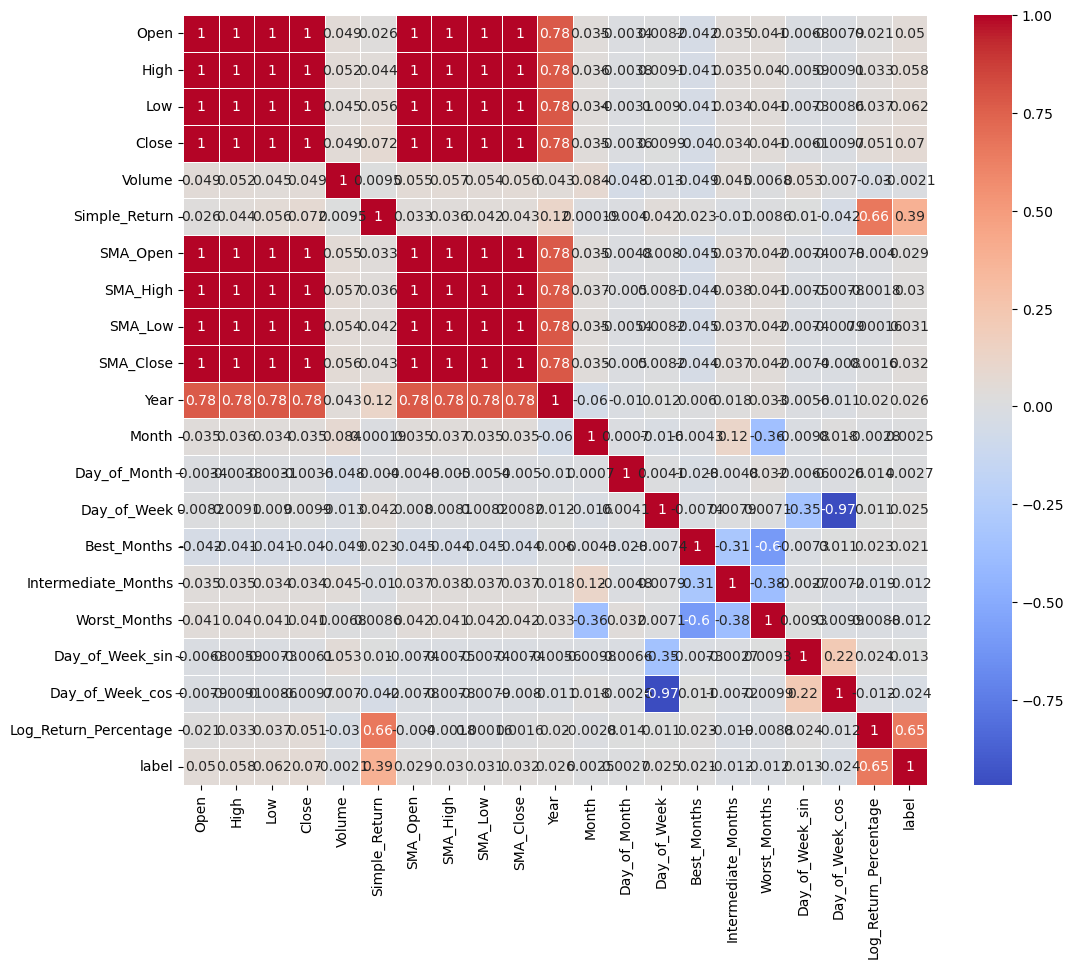

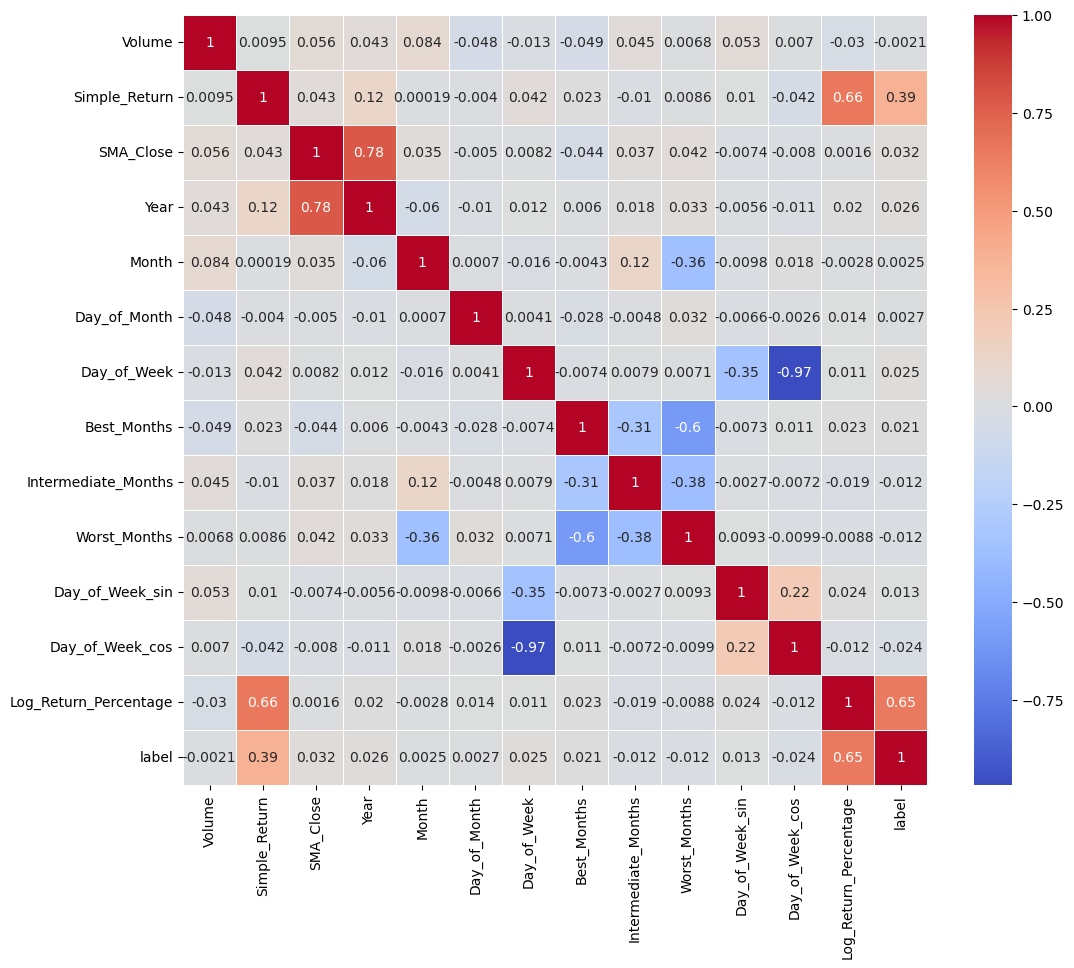

In [13]:
# feature selection
# remove irrelvant features
df = df.drop(["Date", "OpenInt"], axis=1)
# use Pearson correlation to detect features highly correlated with each other
corr_maxtrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_maxtrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()
# remove features that are highly correlated with each other with a threshold of 0.8
df = df.drop(["Open", "High", "Low", "Close", "SMA_Open", "SMA_High", "SMA_Low"], axis=1)
# show the heatmap after highly correlated features are removed
corr_maxtrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_maxtrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [11]:
# split and normalize data; Note: need to run separately from the cell of data with discrete label
# data with continuous label
# Split Dataset randomly, 75% for training, and 25% for testing
dataset = df.drop("label", axis = 1)
y = df["Log_Return_Percentage"]
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25, random_state=334)
# normalize the data using standard scalar
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
# get the label from normalized data
y_train = x_train[:, x_train.shape[1] - 1]
y_test = x_test[:, x_test.shape[1] - 1]
# convert features datasets into pandas dataframe
x_train_pd = pd.DataFrame(x_train, columns=dataset.columns).drop("Log_Return_Percentage", axis=1)
x_test_pd = pd.DataFrame(x_test, columns=dataset.columns).drop("Log_Return_Percentage", axis=1)
# Save the train and test sets to files
x_train_pd.to_csv('continuous/standard/xTrain_continuous.csv', index=False)
x_test_pd.to_csv('continuous/standard/xTest_continuous.csv', index=False)
pd.DataFrame(y_train, columns=["label"]).to_csv('continuous/standard/yTrain_continuous.csv', index=False)
pd.DataFrame(y_test, columns=["label"]).to_csv('continuous/standard/yTest_continuous.csv', index=False)


In [14]:
# data with discrete label
# Split Dataset randomly, 75% for training, and 25% for testing
y = df["label"]
X = df.drop(["Log_Return_Percentage", "label"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=334)
# normalize the data using standard scalar
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)
# Save the train and test sets to files
pd.DataFrame(x_train, columns=X.columns).to_csv('discrete/standard/xTrain_discrete.csv', index=False)
pd.DataFrame(x_test, columns=X.columns).to_csv('discrete/standard/xTest_discrete.csv', index=False)
y_train.to_csv('discrete/standard/yTrain_discrete.csv', index=False)
y_test.to_csv('discrete/standard/yTest_discrete.csv', index=False)